In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import .csv file into DataFrame
ticker = "AAPL"
ticker_data = pd.read_csv(f"../Data/csv/{ticker}.csv")
ticker_data

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,12-12-1980,0.128348,0.128348,469033600,0.128906,0.128348,0.100039
1,15-12-1980,0.121652,0.122210,175884800,0.122210,0.121652,0.094820
2,16-12-1980,0.112723,0.113281,105728000,0.113281,0.112723,0.087861
3,17-12-1980,0.115513,0.115513,86441600,0.116071,0.115513,0.090035
4,18-12-1980,0.118862,0.118862,73449600,0.119420,0.118862,0.092646
...,...,...,...,...,...,...,...
10551,18-10-2022,140.610001,145.490005,99136600,146.699997,143.750000,143.750000
10552,19-10-2022,141.500000,141.690002,61758300,144.949997,143.860001,143.860001
10553,20-10-2022,142.649994,143.020004,64522000,145.889999,143.389999,143.389999
10554,21-10-2022,142.649994,142.869995,86464700,147.850006,147.270004,147.270004


In [3]:
ticker_data.drop(columns="Close")

,Date,Low,Open,Volume,High,Adjusted Close
0,12-12-1980,0.128348,0.128348,469033600,0.128906,0.100039
1,15-12-1980,0.121652,0.122210,175884800,0.122210,0.094820
2,16-12-1980,0.112723,0.113281,105728000,0.113281,0.087861
3,17-12-1980,0.115513,0.115513,86441600,0.116071,0.090035
4,18-12-1980,0.118862,0.118862,73449600,0.119420,0.092646
...,...,...,...,...,...,...
10551,18-10-2022,140.610001,145.490005,99136600,146.699997,143.750000
10552,19-10-2022,141.500000,141.690002,61758300,144.949997,143.860001
10553,20-10-2022,142.649994,143.020004,64522000,145.889999,143.389999
10554,21-10-2022,142.649994,142.869995,86464700,147.850006,147.270004


In [4]:
# int(round(len(ticker_data) * .8 ,0))
training_data = ticker_data.iloc[:int(round(len(ticker_data) * .8 ,0))]
training_set = ticker_data.iloc[:, 5:6].values

In [5]:
training_data

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,12-12-1980,0.128348,0.128348,469033600,0.128906,0.128348,0.100039
1,15-12-1980,0.121652,0.122210,175884800,0.122210,0.121652,0.094820
2,16-12-1980,0.112723,0.113281,105728000,0.113281,0.112723,0.087861
3,17-12-1980,0.115513,0.115513,86441600,0.116071,0.115513,0.090035
4,18-12-1980,0.118862,0.118862,73449600,0.119420,0.118862,0.092646
...,...,...,...,...,...,...,...
8440,02-06-2014,22.232143,22.641430,369350800,22.672501,22.451786,20.056225
8441,03-06-2014,22.437500,22.445000,292709200,22.812143,22.769285,20.339840
8442,04-06-2014,22.718214,22.765715,335482000,23.138929,23.029285,20.572100
8443,05-06-2014,22.950357,23.078571,303805600,23.191786,23.119642,20.652822


In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
X_train = []
y_train = []

for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60 : i, 0])
    y_train.append(training_set_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
import tensorflow as tf
from tensorflow import keras

In [10]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [11]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
62/62 [==============================] - 13s 75ms/step - loss: 2.3413e-05
Epoch 2/100
62/62 [==============================] - 5s 84ms/step - loss: 4.7504e-07
Epoch 3/100
62/62 [==============================] - 5s 83ms/step - loss: 4.5201e-07
Epoch 4/100
62/62 [==============================] - 5s 83ms/step - loss: 4.2726e-07
Epoch 5/100
62/62 [==============================] - 5s 87ms/step - loss: 4.4999e-07
Epoch 6/100
62/62 [==============================] - 5s 87ms/step - loss: 4.1287e-07
Epoch 7/100
62/62 [==============================] - 5s 88ms/step - loss: 4.1093e-07
Epoch 8/100
62/62 [==============================] - 5s 88ms/step - loss: 4.1961e-07
Epoch 9/100
62/62 [==============================] - 5s 88ms/step - loss: 4.6568e-07
Epoch 10/100
62/62 [==============================] - 5s 88ms/step - loss: 4.0309e-07
Epoch 11/100
62/62 [==============================] - 6s 91ms/step - loss: 4.0757e-07
Epoch 12/100
62/62 [==============================] - 6s 91ms/

In [12]:
test_data = ticker_data.iloc[-(int(round(len(ticker_data) * .2 ,0))):]
test_set = ticker_data.iloc[:, 5:6].values


In [13]:
test_data

,Date,Low,Open,Volume,High,Close,Adjusted Close
8445,09-06-2014,22.937500,23.174999,301660000,23.469999,23.424999,20.925592
8446,10-06-2014,23.392500,23.682501,251108000,23.762501,23.562500,21.048422
8447,11-06-2014,23.367500,23.532499,182724000,23.690001,23.465000,20.961321
8448,12-06-2014,22.975000,23.510000,218996000,23.530001,23.072500,20.610708
8449,13-06-2014,22.719999,23.049999,218100000,23.110001,22.820000,20.385149
...,...,...,...,...,...,...,...
10551,18-10-2022,140.610001,145.490005,99136600,146.699997,143.750000,143.750000
10552,19-10-2022,141.500000,141.690002,61758300,144.949997,143.860001,143.860001
10553,20-10-2022,142.649994,143.020004,64522000,145.889999,143.389999,143.389999
10554,21-10-2022,142.649994,142.869995,86464700,147.850006,147.270004,147.270004


In [14]:
dataset_total = pd.concat((training_data['Adjusted Close'], test_data['Adjusted Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 2000):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

61/61 [==============================] - 3s 23ms/step


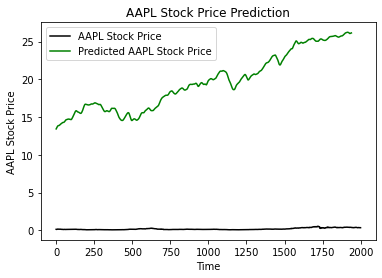

In [15]:
plt.plot(test_set[:2000], color = 'black', label = f"{ticker} Stock Price")
plt.plot(predicted_stock_price, color = 'green', label = f"Predicted {ticker} Stock Price")
plt.title(f"{ticker} Stock Price Prediction")
plt.xlabel('Time')
plt.ylabel('AAPL Stock Price')
plt.legend()
plt.show()